In [1]:
import pandas as pd

In [121]:
data = pd.read_csv('heart_disease_data.csv')

In [122]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [123]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [124]:
data_dup = data.duplicated().any()

In [125]:
data_dup

True

In [126]:
data = data.drop_duplicates()

In [127]:
data_dup = data.duplicated().any()

In [128]:
data_dup

False

In [129]:
cate_val=[]
cont_val=[]


for column in data.columns:
  if data[column].nunique() <=10:
    cate_val.append(column)
  else:
    cont_val.append(column)

In [130]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [131]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [132]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [133]:
data['cp'].unique()  #unique value of cp

array([3, 2, 1, 0], dtype=int64)

In [134]:
cate_val.remove('sex')
cate_val.remove('target')
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [135]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
st = StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [138]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv('heart_disease_data.csv')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [142]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


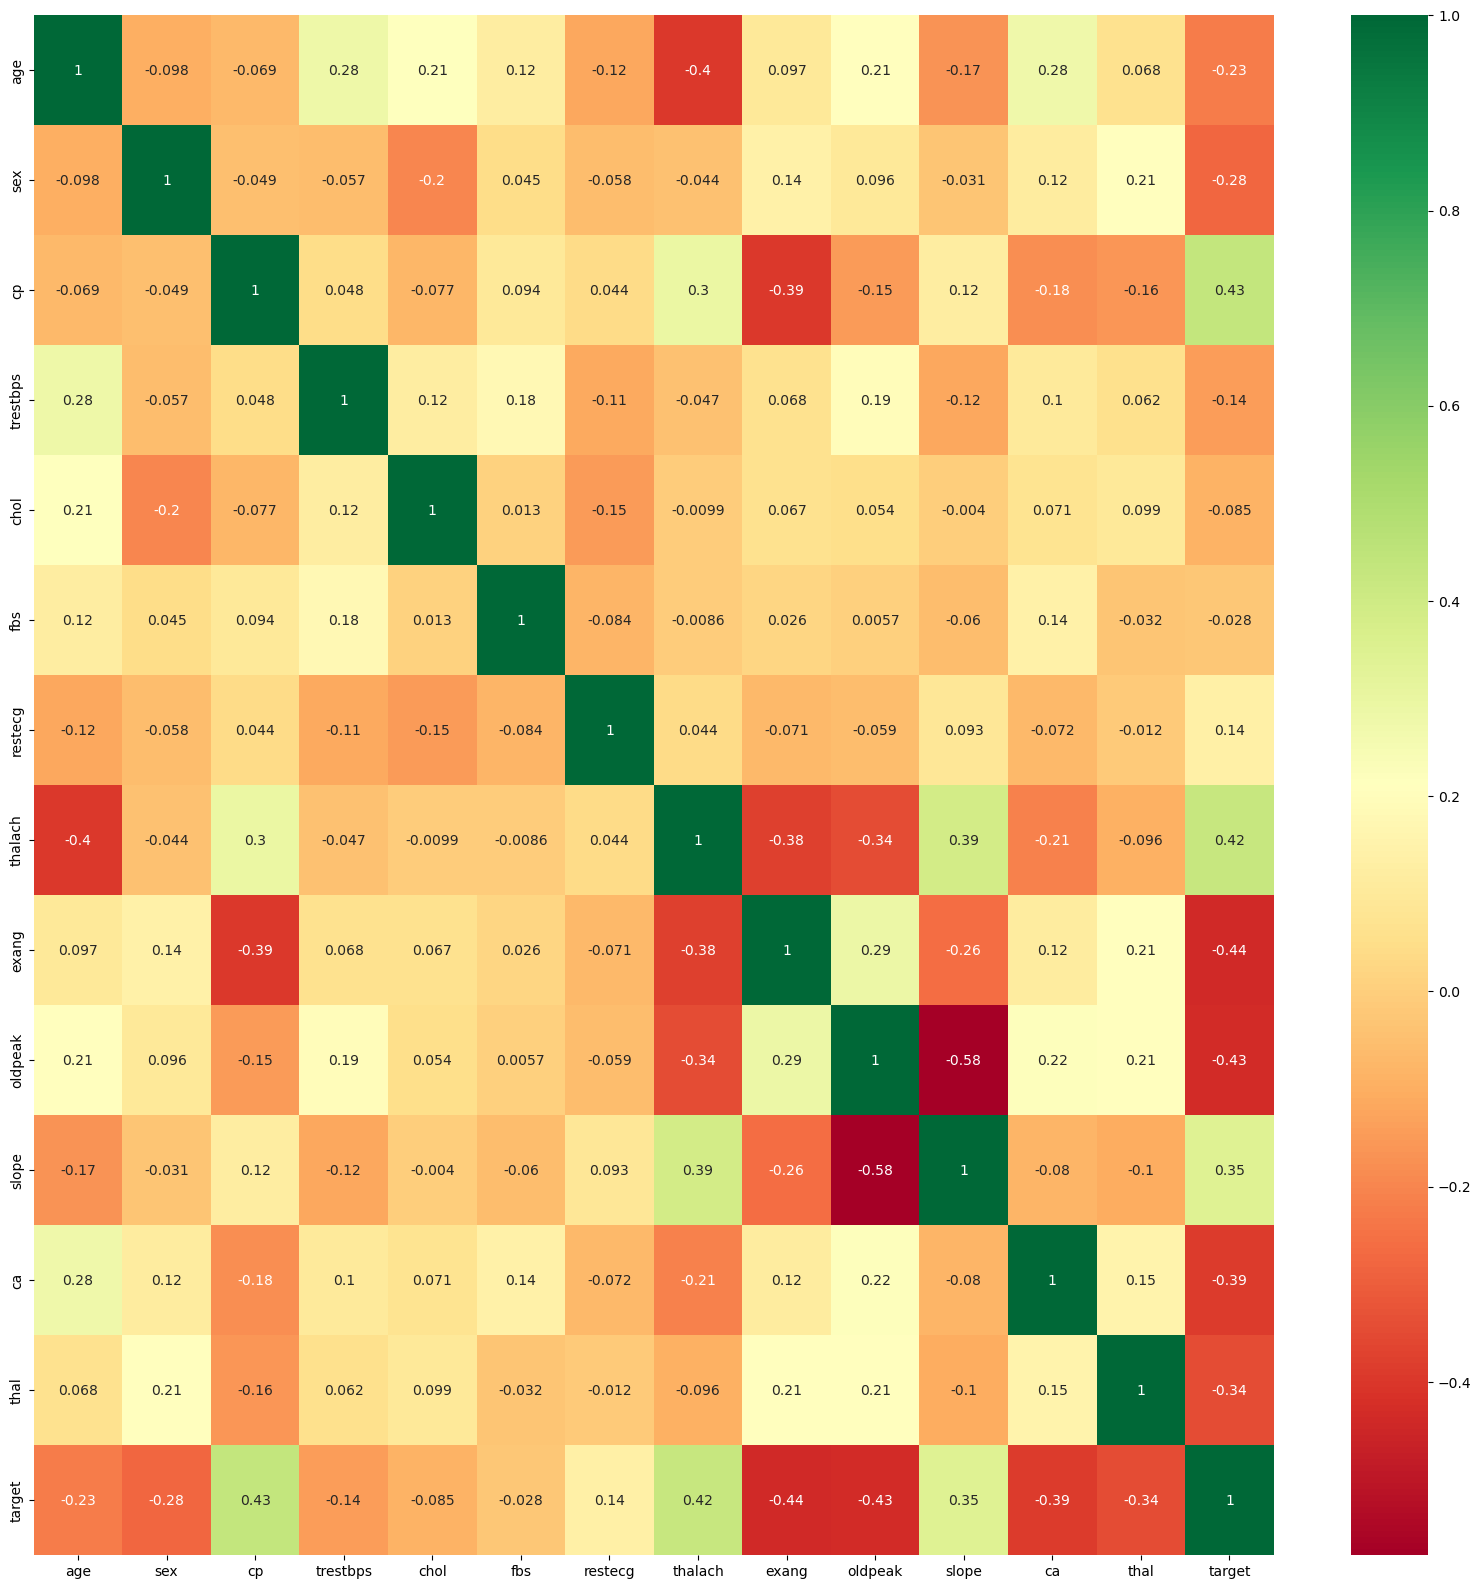

In [143]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

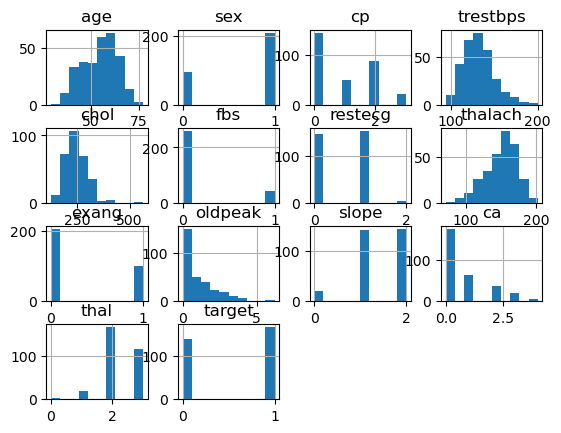

In [144]:
df.hist()

In [145]:
X = data.drop('target',axis=1)

In [146]:
Y = data['target']

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.2,random_state=42)

In [149]:
Y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: target, Length: 61, dtype: int64

In [150]:
from sklearn.linear_model import LogisticRegression 

In [151]:
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [152]:
Y_pred1 = log.predict(X_test)

In [153]:
from sklearn.metrics import accuracy_score

In [154]:
accuracy_score(Y_test,Y_pred1)

0.9016393442622951

In [155]:
from sklearn import svm

In [156]:
svm = svm.SVC()

In [157]:
svm.fit(X_train,Y_train)

SVC()

In [158]:
Y_pred2=svm.predict(X_test)

In [159]:
accuracy_score(Y_test,Y_pred2)

0.8688524590163934

In [160]:
data= pd.read_csv('heart_disease_data.csv')

In [161]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [162]:
data = data.drop_duplicates()

In [163]:
data.shape

(302, 14)

In [164]:
X=data.drop('target',axis=1)
Y=data['target']

In [165]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.2,random_state=42)

In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
knn = KNeighborsClassifier()

In [168]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [169]:
Y_pred3 = knn.predict(X_test)

In [170]:
accuracy_score(Y_test,Y_pred3)

0.6557377049180327

In [171]:
score = []

for k in range(1,40):
  knn=KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train,Y_train)
  Y_pred = knn.predict(X_test)
  score.append(accuracy_score(Y_test,Y_pred))

In [172]:
score

[0.5409836065573771,
 0.6065573770491803,
 0.6229508196721312,
 0.6721311475409836,
 0.6557377049180327,
 0.7049180327868853,
 0.6557377049180327,
 0.6885245901639344,
 0.6557377049180327,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6229508196721312,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.6721311475409836,
 0.6065573770491803,
 0.639344262295082,
 0.6065573770491803,
 0.639344262295082,
 0.6065573770491803,
 0.6557377049180327,
 0.639344262295082,
 0.6557377049180327,
 0.639344262295082]

In [173]:
knn=KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.6065573770491803

In [174]:
from sklearn.tree import DecisionTreeClassifier

In [175]:
dt = DecisionTreeClassifier()

In [176]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [177]:
Y_pred4 = dt.predict(X_test)

In [178]:
accuracy_score(Y_test,Y_pred4)

0.8032786885245902

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
rf = RandomForestClassifier()

In [181]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [182]:
Y_pred5=rf.predict(X_test)

In [183]:
accuracy_score(Y_test,Y_pred5)

0.8688524590163934

In [184]:
from sklearn.ensemble import GradientBoostingClassifier

In [185]:
gb = GradientBoostingClassifier()

In [186]:
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [187]:
Y_pred6 = gb.predict(X_test)

In [188]:
accuracy_score(Y_test,Y_pred6)

0.8524590163934426

In [189]:
final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],'ACC':[accuracy_score(Y_test,Y_pred1),
                                                                           accuracy_score(Y_test,Y_pred2),
                                                                           accuracy_score(Y_test,Y_pred3),
                                                                           accuracy_score(Y_test,Y_pred4),
                                                                           accuracy_score(Y_test,Y_pred5),
                                                                           accuracy_score(Y_test,Y_pred6),
                                                                           ]})

In [190]:
final_data

,Models,ACC
0,LR,0.901639
1,SVM,0.868852
2,KNN,0.655738
3,DT,0.803279
4,RF,0.868852
5,GB,0.852459


In [191]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

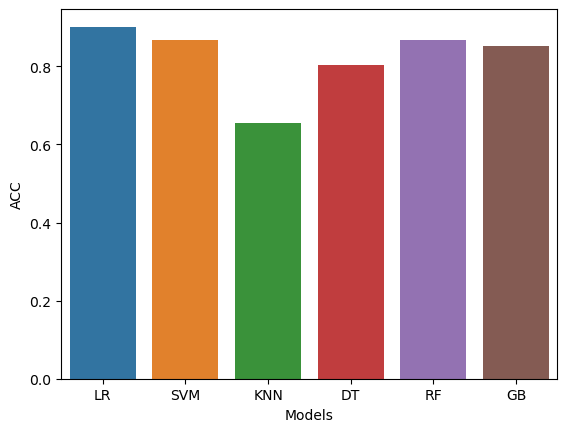

In [192]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'])

In [193]:
X=data.drop('target',axis=1)
Y=data['target']

In [194]:
X.shape

(302, 13)

In [195]:
from sklearn.linear_model import LogisticRegression 

In [196]:
log = LogisticRegression()
log.fit(X,Y)

C:\Users\HP\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [197]:
import pandas as pd

In [198]:
new_data = pd.DataFrame({
    'age':[63],
    'sex':[1],
    'cp':[3],
    'trestbps':[145],
    'chol':[23],
    'fbs':[1],
    'restecg':[0],
    'thalach':[150],
    'exang':[0],
    'oldpeak':[2.3],
    'slope':[3],
    'ca':[0],
    'thal':[6],
},index=[0])

In [199]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,23,1,0,150,0,2.3,3,0,6


In [200]:
p=log.predict(new_data)
if p[0]==0:
  print('The person does not have heart disease')
else:
  print('The person has heart disease')

The person does not have heart disease


In [201]:
import joblib

In [202]:
joblib.dump(log,'heart_disease_model.pkl')

['heart_disease_model.pkl']

In [203]:
model = joblib.load('heart_disease_model.pkl')

In [204]:
model.predict(new_data)

array([0], dtype=int64)

In [205]:
from tkinter import *
import joblib

In [ ]:
from tkinter import *
import joblib
from PIL import Image, ImageTk
from tkinter import ttk  # Import ttk for the Combobox

def show_entry_fields():
    try:
        p1 = float(e1.get())
        sex_value = sex_var.get()
        p2 = 1 if sex_value == 'Male' else 0  # Convert 'Male' to 1 and 'Female' to 0
        p3 = float(e3.get())
        p4 = float(e4.get())
        p5 = float(e5.get())
        p6 = float(e6.get())
        p7 = float(e7.get())
        p8 = float(e8.get())
        p9 = float(e9.get())
        p10 = float(e10.get())
        p11 = float(e11.get())
        p12 = float(e12.get())
        p13 = float(e13.get())

        model = joblib.load('heart_disease_model.pkl')
        result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])

        result_text = "No Heart Disease\nYou are Healthy\nCongratulations" if result == 0 else "Possibility of Heart Disease\nPlease Consult Doctors"
        result_label.config(text=result_text)
    except Exception as e:
        result_label.config(text=f"Error: {e}")

master = Tk()
master.title("Heart Disease Prediction Using Machine Learning")

# Set the background color for the entire window
bg_color = "#ADD8E6"  # Light blue background color
master.configure(bg=bg_color)

# Load and display the hospital logo
logo_img = Image.open('hospital_logo.png')
logo_img = logo_img.resize((200, 100), Image.ANTIALIAS)
logo_photo = ImageTk.PhotoImage(logo_img)
logo_label = Label(master, image=logo_photo, bg=bg_color)
logo_label.grid(row=0, column=1, pady=10)

# Center the heading across multiple columns with larger font
label = Label(master, text="Heart Disease Prediction System", bg="black", fg="white", font=("Helvetica", 18, "bold"))
label.grid(row=1, column=1, columnspan=1, pady=20, sticky="n")

# Labels and entries with larger font
font = ("Helvetica", 11)
Label(master, text="Age", font=font, bg=bg_color).grid(row=2, column=0, sticky="e", padx=10, pady=5)
Label(master, text="Sex", font=font, bg=bg_color).grid(row=3, column=0, sticky="e", padx=10, pady=5)
Label(master, text="Chest Pain", font=font, bg=bg_color).grid(row=4, column=0, sticky="e", padx=10, pady=5)
Label(master, text="Resting BPs", font=font, bg=bg_color).grid(row=5, column=0, sticky="e", padx=10, pady=5)
Label(master, text="Cholesterol", font=font, bg=bg_color).grid(row=6, column=0, sticky="e", padx=10, pady=5)
Label(master, text="Fasting blood sugar", font=font, bg=bg_color).grid(row=7, column=0, sticky="e", padx=10, pady=5)
Label(master, text="Resting ECG", font=font, bg=bg_color).grid(row=8, column=0, sticky="e", padx=10, pady=5)
Label(master, text="Thalach (Max HRT Rate)", font=font, bg=bg_color).grid(row=9, column=0, sticky="e", padx=10, pady=5)
Label(master, text="Exang (Exercise-induced angina)", font=font, bg=bg_color).grid(row=10, column=0, sticky="e", padx=10, pady=5)
Label(master, text="Oldpeak (ST depression induced by exercise)", font=font, bg=bg_color).grid(row=11, column=0, sticky="e", padx=10, pady=5)
Label(master, text="Slope (Slope of the peak Exercise)", font=font, bg=bg_color).grid(row=12, column=0, sticky="e", padx=10, pady=5)
Label(master, text="CA (no. of major vessels colored by fluoroscopy)", font=font, bg=bg_color).grid(row=13, column=0, sticky="e", padx=10, pady=5)
Label(master, text="Thalassemia", font=font, bg=bg_color).grid(row=14, column=0, sticky="e", padx=10, pady=5)

# Larger entry boxes with a white background
entry_bg = "white"
entry_width = 30
e1 = Entry(master, font=font, width=entry_width, bg=entry_bg)
sex_var = StringVar(value='Male')  # Default value for sex
sex_male = Radiobutton(master, text="Male", variable=sex_var, value='Male', font=font, bg=bg_color)
sex_female = Radiobutton(master, text="Female", variable=sex_var, value='Female', font=font, bg=bg_color)
e3 = Entry(master, font=font, width=entry_width, bg=entry_bg)
e4 = Entry(master, font=font, width=entry_width, bg=entry_bg)
e5 = Entry(master, font=font, width=entry_width, bg=entry_bg)
e6 = Entry(master, font=font, width=entry_width, bg=entry_bg)
e7 = Entry(master, font=font, width=entry_width, bg=entry_bg)
e8 = Entry(master, font=font, width=entry_width, bg=entry_bg)
e9 = Entry(master, font=font, width=entry_width, bg=entry_bg)
e10 = Entry(master, font=font, width=entry_width, bg=entry_bg)
e11 = Entry(master, font=font, width=entry_width, bg=entry_bg)
e12 = Entry(master, font=font, width=entry_width, bg=entry_bg)
e13 = Entry(master, font=font, width=entry_width, bg=entry_bg)

# Align elements in the middle
e1.grid(row=2, column=1, pady=5)
sex_male.grid(row=3, column=1, padx=75, pady=5, sticky='w')
sex_female.grid(row=3, column=1, padx=150, pady=5, sticky='w')
e3.grid(row=4, column=1, pady=5)
e4.grid(row=5, column=1, pady=5)
e5.grid(row=6, column=1, pady=5)
e6.grid(row=7, column=1, pady=5)
e7.grid(row=8, column=1, pady=5)
e8.grid(row=9, column=1, pady=5)
e9.grid(row=10, column=1, pady=5)
e10.grid(row=11, column=1, pady=5)
e11.grid(row=12, column=1, pady=5)
e12.grid(row=13, column=1, pady=5)
e13.grid(row=14, column=1, pady=5)

# Center the button
Button(master, text="Predict", command=show_entry_fields, font=("Helvetica", 12, "bold")).grid(row=15, column=1, columnspan=2, pady=20)

# Add empty columns to the left and right for centering the form
master.grid_columnconfigure(0, weight=1)
master.grid_columnconfigure(3, weight=1)

# Add a label to display the result, centered
result_label = Label(master, text="", font=("Helvetica", 12), bg=bg_color)
result_label.grid(row=16, column=1, columnspan=1, pady=10)

master.mainloop()


C:\Users\HP\AppData\Local\Temp\ipykernel_23276\3929466.py:40: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  logo_img = logo_img.resize((200, 100), Image.ANTIALIAS)
